In [111]:
from pydmd import DMD
from datadriven.methods import SINDy
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate

# DMD vs SINDy

## Atrator de Thomas

$$
\frac{dx}{dt} = \sin(y) - bx
\\
\frac{dy}{dt} = \sin(z) - by
\\
\frac{dz}{dt} = \sin(x) - bz
$$

In [112]:
b = 0.208186
dt = 0.01; t = np.arange(0, 100, dt)
def thomas_attractor(x_y_z, t0, b=b):
    x, y, z = x_y_z
    return np.array([
        np.sin(y) - b*x,
        np.sin(z) - b*y,
        np.sin(x) - b*z
    ])
np.random.seed(6661)
x0 = np.random.uniform(-3, 3, size=(1, 3))[0]
x = integrate.odeint(thomas_attractor, x0, t)
x.shape

(10000, 3)

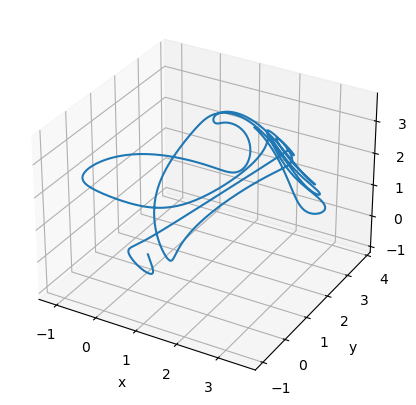

In [136]:
# plot 3d
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111, projection='3d')
ax.plot(*x.T)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()

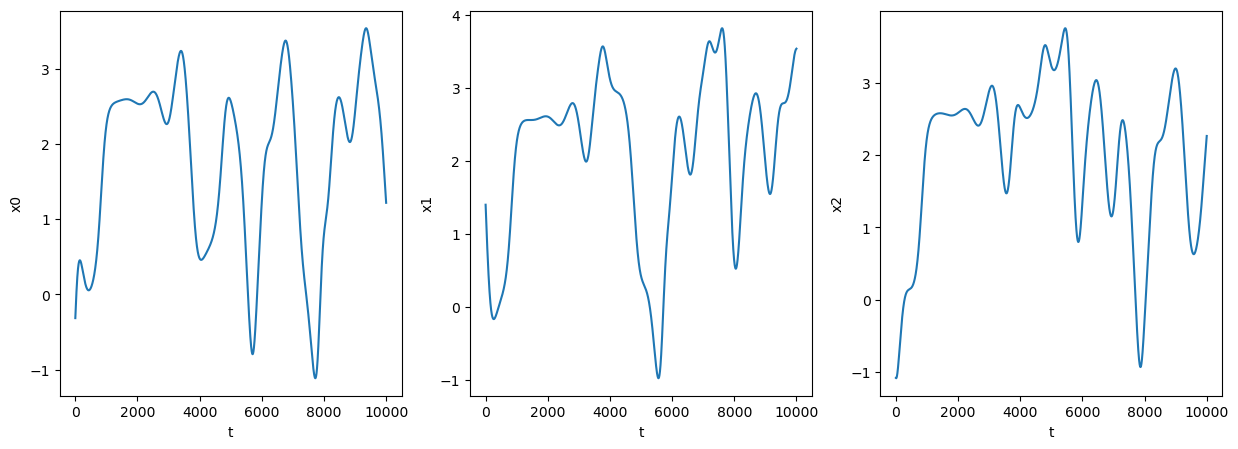

In [135]:
# plot only x, only y, only z, side by side
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for i, ax in enumerate(axes):
    ax.plot(x[:, i])
    ax.set_xlabel('t')
    ax.set_ylabel(f'x{i}')
plt.show()

In [115]:
x.shape

(10000, 3)

## Aplicando o DMD

In [116]:
dmd = DMD(svd_rank=3)
dmd.fit(x)
dmd.modes.shape

(10000, 2)

In [117]:
dmd.reconstructed_data.shape

(10000, 3)

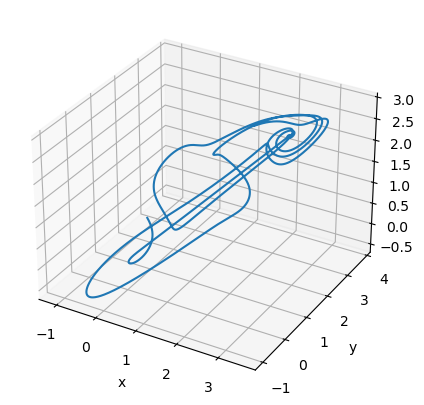

In [137]:
# plot reconstructed trajectory
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111, projection='3d')
ax.plot(*dmd.reconstructed_data.T.real)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()

IndexError: index 2 is out of bounds for axis 1 with size 2

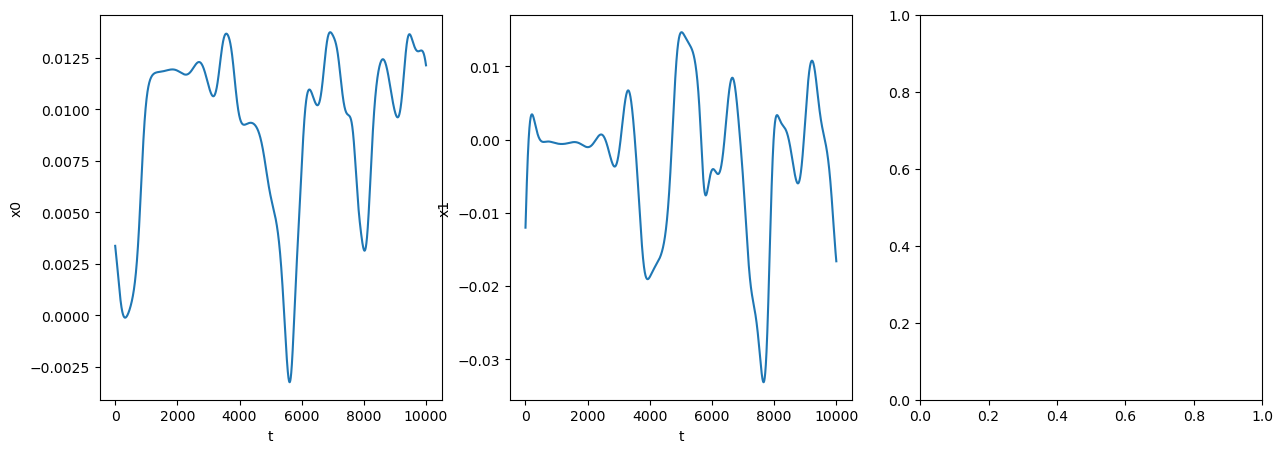

In [138]:
# plot mode 1
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for i, ax in enumerate(axes):
    ax.plot(dmd.modes.real[:, i])
    ax.set_xlabel('t')
    ax.set_ylabel(f'x{i}')
plt.show()

## Aplicando o SINDy

In [122]:
dx = np.zeros_like(x)
for j in range(len(t)):
    dx[j, :] = thomas_attractor(x[j, :], 0, b)

In [123]:
candidates = [
    lambda x, y, z: x,
    lambda x, y, z: y,
    lambda x, y, z: z,
    lambda x, y, z: x*y,
    lambda x, y, z: np.sin(x),
    lambda x, y, z: np.sin(y),
    lambda x, y, z: np.sin(z),
]

In [124]:
sindy = SINDy(x, dx, candidates)

In [126]:
lamb = 0.025
sindy.sparsify(lamb, 10)
print(sindy.xi.shape)
sindy.xi

(7, 3)


array([[-0.208186,  0.      ,  0.      ],
       [ 0.      , -0.208186,  0.      ],
       [ 0.      ,  0.      , -0.208186],
       [ 0.      ,  0.      ,  0.      ],
       [ 0.      ,  0.      ,  1.      ],
       [ 1.      ,  0.      ,  0.      ],
       [ 0.      ,  1.      ,  0.      ]])

In [127]:
x_sindy = integrate.odeint(sindy.model, x0, t,rtol=10**(-12),atol=10**(-12)*np.ones_like(x0))

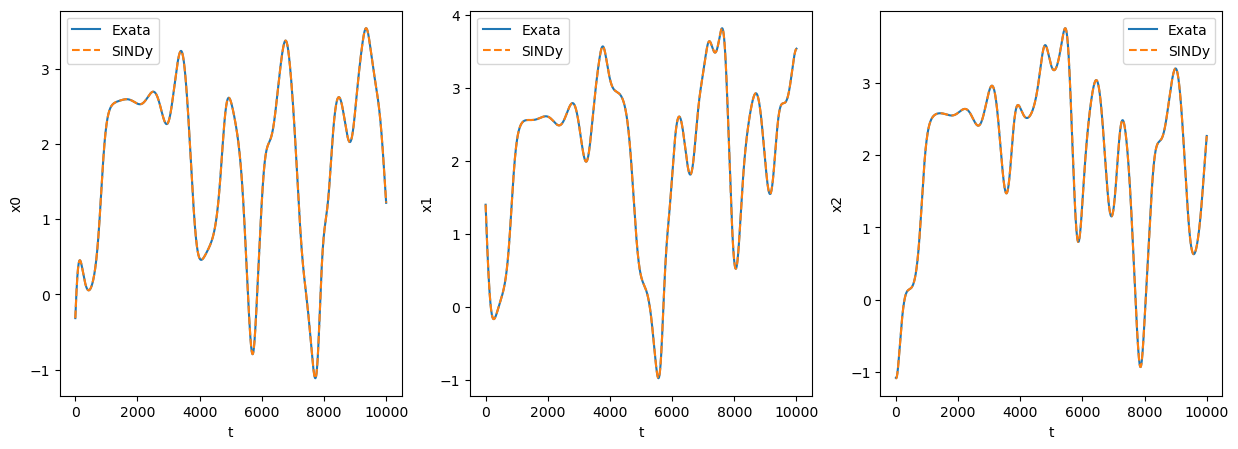

In [140]:
# plot x (solid) and x_sindy (dashed)
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for i, ax in enumerate(axes):
    ax.plot(x[:, i], label='Exata')
    ax.plot(x_sindy[:, i], '--', label='SINDy')
    ax.set_xlabel('t')
    ax.set_ylabel(f'x{i}')
    ax.legend()
plt.show()

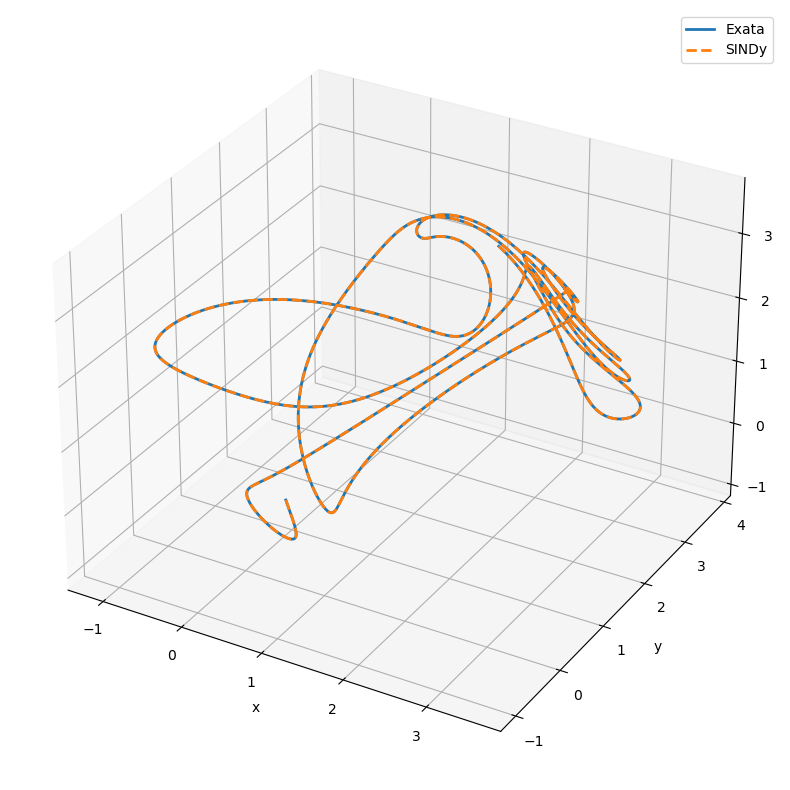

In [141]:
# plot x (solid) and x_sindy (dashed), 3d
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111, projection='3d')
ax.plot(*x.T, lw=2.0, label='Exata')
ax.plot(*x_sindy.T, '--', lw=2.0, label='SINDy')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.legend()
plt.show()